## Spencer's notes:
Eric's 'planet_moon_star.jl' code calls a package called 'CGS' that is not listed in the Julia repository. I had to make a copy of 'cgs.jl' and 'planet_moon_star.jl' (replacing 'using CGS' with 'include("cgs.jl")). I also had to modify Eric's function to return the map. Currently, it just displays the figure and doesn't return any information.

This homework looks really straightforward. We simply need to vary 'yplanet' and call 'planet_moon_star' to create a lensing map. We then create an image of a circular source with radius R (make a 2D array where 0 = outside the circle and 1 = inside the circle) and convolve it with the lensing map.

The convolving part is really easy. Julia has a function called 'conv2' which does a circular convolution. You pass it two matricies (the lensing map and the 2d array of the circle) and it constructs a convolved image. We then just need to get the max magnification in the convolved image.

In [2]:
using PyPlot
include("planet_moon_star.jl")

planet_moon_star (generic function with 1 method)

Mass ratio: 1.0e-5
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
10000/

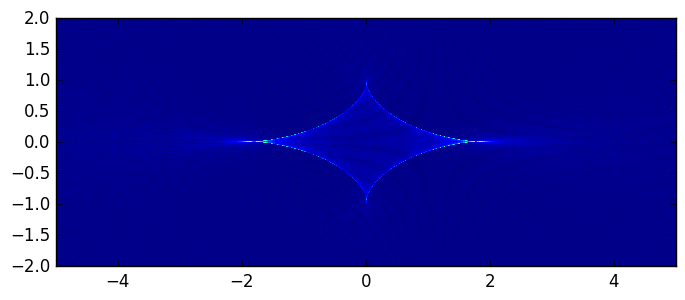

1000x1000 Array{Float64,2}:
 1.0       1.0       1.55556   0.857143  …  1.0       1.16667   0.954545
 0.75      0.75      0.84      0.9          0.833333  0.678571  0.913043
 1.0       1.0       1.0       1.0          1.16667   1.04762   1.16667 
 1.33333   1.0       0.913043  0.75         1.05556   1.0       1.11111 
 0.75      0.923077  1.16667   1.33333      1.22222   1.0       1.0     
 1.0       0.857143  1.05556   1.11111   …  1.0       1.05556   1.0     
 1.0       0.857143  0.857143  0.875        0.84      0.75      0.791667
 0.703704  0.72      0.857143  1.16667      0.75      1.0       1.16667 
 1.28571   1.33333   1.33333   1.55556      0.9       1.11111   1.05556 
 1.0       1.0       0.818182  0.875        1.05556   1.11111   1.05    
 0.875     0.75      0.9       1.0       …  1.16667   1.0       1.04762 
 1.16667   1.0       1.0       0.952381     0.95      0.875     0.75    
 1.55556   1.33333   0.96      0.888889     0.863636  1.27778   0.904762
 ⋮                     

10000
Range of grid, y1: 1.284188611699158 1.289502819307071 1.315811388300842 1.3105572639684722
Range of grid, y2: -0.047434164902525694 -0.016995661284574956 0.047434164902525694 0.016995661284574956


In [3]:
yplanet = 1.3
y1moon = 0.0
y2moon = 0.0
eps1 = 1e-5
eps2 = 0.0
lens_map = planet_moon_star(yplanet,y1moon,y2moon,eps1,eps2)

In [4]:
len, len = size(lens_map)
source_map = zeros(Float64, len, len)
size(lens_map)

(1000,1000)

In [5]:
function pl_map(dist,r,len)

    source_map = zeros(Float64, len, len)
    r2 = r^2
    for i in 1:len
        for j in 1:len
            x = (i-1)*(0.01) - 5.0 + 0.005
            y = (j-1)*(0.004) - 2.0 + 0.002
            if (x^2 + y^2) < r2
                source_map[i,j] = 1.0
            end
        end
    end
    return source_map
end

pl_map (generic function with 1 method)

In [17]:
source_map = pl_map(1.,1.,1000)

1000x1000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [25]:
radii = collect(linspace(0.25,4.0,16))
maxvals = zeros(16)
for i in 1:16
    source_map = pl_map(1.3,radii[i],1000)
    conv_image = conv2(source_map, lens_map)
    maxvals[i] = maximum(conv_image)
end

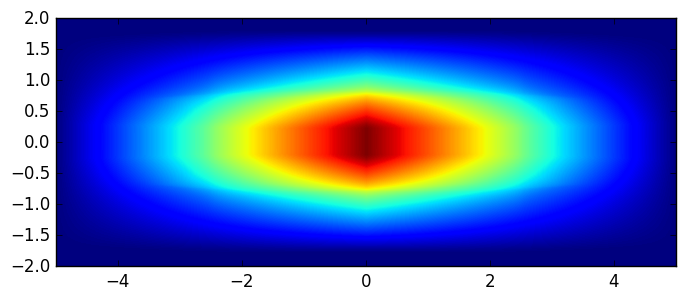

PyObject <matplotlib.image.AxesImage object at 0x7fa85f5b1b90>

In [26]:
PyPlot.imshow(conv_image, interpolation = "nearest", extent =[-5,5,-2,2])

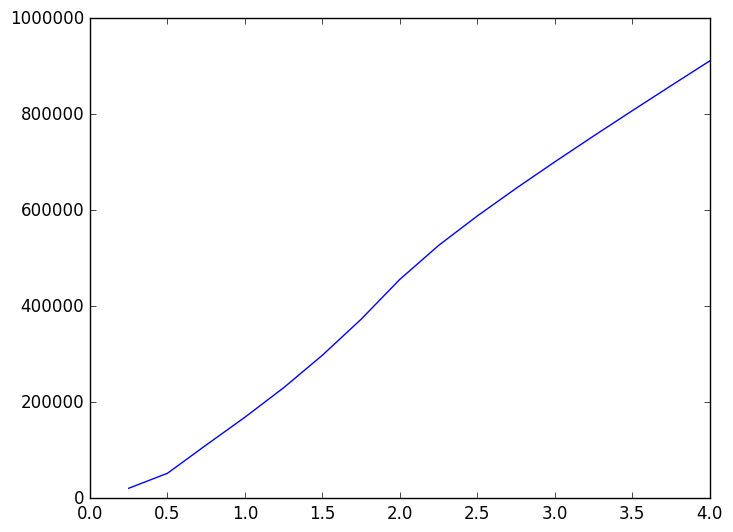

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa85f4efa50>

In [27]:
plot(radii,maxvals)